<a href="https://colab.research.google.com/github/roberthsu2003/machine_learning/blob/main/%E7%B0%A1%E5%96%AE%E7%B7%9A%E6%80%A7%E8%BF%B4%E6%AD%B8/cost_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## cost function的計算

In [1]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=b7d05de95c9e3f7829ac7f38380b9dfcc979c0ab77d8d0bcb294831ce5428cdf
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [2]:

#下載檔案
import wget
wget.download('https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/Salary_Data.csv')

#下載字型
wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")

'ChineseFont.ttf'

In [3]:
#讀取資料
import pandas as pd

url = "Salary_Data.csv"
data = pd.read_csv(url)
data
# y = w*x + b
x = data["YearsExperience"]
y = data["Salary"]

In [4]:
#假設w和b的值,計算預測值
#透體預測計,計算成本

w = 10
b = 0
y_pred = w*x + b #預測值

#(真實值-預測值)^2
cost = (y - y_pred) ** 2 #計算成本
cost.sum() / len(x) #求平均

np.float64(602.547878787879)

### 建立計算cost的function

In [5]:
def compute_cost(x, y, w, b):
    y_pred = w*x + b
    cost = (y - y_pred) ** 2
    cost = cost.sum() / len(x)
    return cost

In [6]:
#測試cost function,w=10,b=0
compute_cost(x, y, w=10, b=0)

np.float64(602.547878787879)

In [ ]:
#當 b=0, w=-100~100 所有的cost會是多少
costs = []
for w in range(-100, 101):
    cost = compute_cost(x, y, w=w, b=0)
    costs.append(cost)

costs

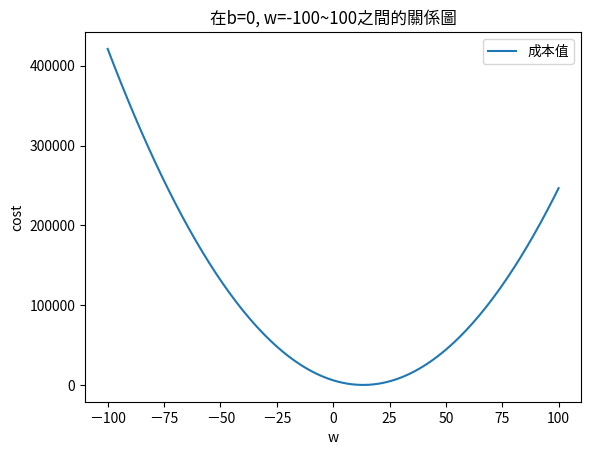

In [8]:
#繪覺 b=0, w=-100~100 和cost之間關係圖
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

#plt.scatter(range(-100,101), costs)
plt.plot(range(-100,101), costs,label='成本值')
plt.title("在b=0, w=-100~100之間的關係圖")
plt.xlabel('w')
plt.ylabel('cost')
plt.legend()
plt.show()

In [ ]:
# w=-100~100, b=-100~100的cost
import numpy as np

ws = np.arange(-100,101)
bs = np.arange(-100,101)
costs = np.zeros((201,201)) #2維,shape(201,201)
for w_index, w in enumerate(ws):
    for b_index, b in enumerate(bs):
        cost = compute_cost(x, y, w=w, b=b)
        costs[w_index, b_index] = cost

costs.shape
costs

### 建立3d圖表示w,b,cost之間的關係


109 129


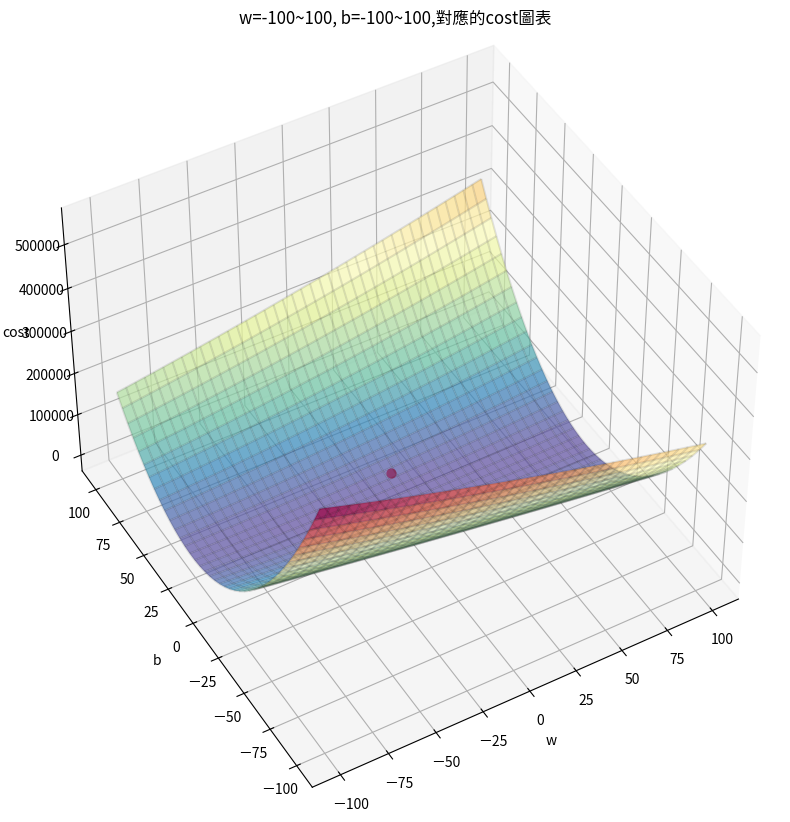

當w=9, b=29, 會有最小cost:32.6948484848485


In [10]:
import numpy as np
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d') #建立3D圖
ax.view_init(45,-120) #轉動角度(上下,左右)
w_grid, b_grid = np.meshgrid(ws, bs) #建立meshgrid
ax.plot_surface(w_grid, b_grid, costs,cmap='Spectral_r', alpha=0.7) #建立3d圖
ax.plot_wireframe(w_grid, b_grid, costs, color='black', alpha=0.1)
ax.set_title("w=-100~100, b=-100~100,對應的cost圖表")
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('cost')
#取出最低的cost值
min_cost = np.min(costs)
#取出cost最低的w索引值和b索引值
w_index, b_index = np.where(costs == min_cost) #值出是1維ndArray
w_index, b_index = w_index[0], b_index[0]
print(w_index, b_index)
#取出最低的w值和最低的b值
w_value, b_value = (ws[w_index], bs[b_index])

#畫出最小點的值
ax.scatter(w_value, b_value,costs[w_index, b_index],color='red', s= 40)

plt.show()
print(f"當w={w_value}, b={b_value}, 會有最小cost:{costs[w_index, b_index]}")